In [1]:
library(ggplot2)
library(coda)

# Introduction

Marks are indicated in square brackets. Please enter your answers either in Markdown format (using Latex for maths expressions) in the "YOUR ANSWER HERE" cells (you need to double-click to active the cell) or using R code in the `# YOUR CODE HERE` cells (just click and type). Do not use code cells for text and maths or Markdown cells for code. 

The data file `mydata.txt` is available in the same directory as this notebook file, and can therefore be read in using only the filename. 

# The Problem

We wish to analyse some data that records the heights $h = \{h_{i}\}_{i\in[1..n]}$ of $n = 200$ plants of a particular species. 

# Question

Read in the data from file 'mydata.txt' and extract the heights vector. [2]

## Answer

In [2]:
# YOUR CODE HERE
data <- read.table("mydata.txt", sep = "" )
h <- as.vector(data[,1])
h

[1] 123.34495 113.03420 107.74031  93.50552 105.75332 103.16530 103.59221
  [8] 107.27378  97.56064 100.47429 102.93401  99.67049 102.38683 117.55299
 [15]  92.99406 107.34547 116.28453 115.36252  96.44902 101.31896  89.17549
 [22] 100.50015 113.83002 105.50509 113.99323  92.84420 118.02391  72.85491
 [29]  90.95892  94.94762 106.63647  98.14278 105.89979  99.84913 108.91914
 [36]  95.56369  93.58165  97.87410  82.68604  79.86758  92.60198  89.85641
 [43] 101.22234 104.68906 100.14659  89.90495  93.13362  97.52026 118.74838
 [50] 107.04774 104.30546 113.00864 106.39479  87.61382  84.40267 114.20634
 [57] 108.00487 112.21411 100.21194 109.52723  98.75206 102.45778 110.32250
 [64]  95.04003  93.64414 104.42286  72.26251 104.09357  89.79577  87.22542
 [71] 102.57228 110.05016 110.54685  98.59610 100.94778 109.84266 101.73792
 [78]  86.71573  91.13341  84.43196 102.65572  92.56780  76.72773 102.54046
 [85]  84.84332 112.94163 112.47504  89.02326  99.58860 112.75643 101.65074
 [92]  95.43063  95.75790 106.17370  96.04912  86.09012 100.96526 104.06366
 [99] 108.33041 106.08160 100.56134  82.73082  89.56801  97.29652 107.05118
[106] 100.74811  97.55494  89.62596  94.26932  99.21352 100.49368  82.61867
[113]  94.44115 114.28102  98.09930  93.41589  98.43163 109.10188  85.53562
[120] 111.10319  82.56349  88.81321 114.51846  93.74430  98.82073 102.03314
[127]  99.23285 130.76109 105.37850  99.50154 107.37598  94.57724 113.12058
[134]  87.51741 104.13144  85.49223  92.93412  88.87074 107.18619 103.14311
[141] 108.68385 104.06558 110.04268  90.86649  80.44044  90.02463 110.58892
[148]  90.95564 124.34950 102.93801  84.14796 100.62132  81.71094 103.26650
[155] 108.96443 110.96075 109.22366 107.92688  79.75936  90.49543 103.66921
[162] 102.49587 105.86730 112.43596  90.75343 118.00223 111.13227 106.17551
[169] 124.26121 100.21414 119.91510 108.29954 102.84776  99.95529  95.97717
[176]  96.44999 122.94881  96.99619 105.03252 103.50112  94.57956 106.37994
[183] 113.47373 105.09609  78.38984 108.76979 104.87409  93.16307 106.60489
[190]  78.07395  91.20098 100.94452  95.25590 103.43137 117.63793  97.77123
[197] 101.64986 104.69359 100.33534  91.95580

The following command should show the first six elements of the data.

In [3]:
head(h)

[1] 123.34495 113.03420 107.74031  93.50552 105.75332 103.16530

We are interested in the underlying mean height of the plants, $\mu$ and the variance of their heights $1/\tau$. We assume that our knowedge of the heights is captured by a Normal distribution with mean $\mu$ and inverse variance ('precision') $\tau$, and that the heights of plants are independent once we know the values of these parameters. (We assume that $\mu$ is large enough compared to $1/\sqrt{\tau}$ that the probability of negative heights is negligibly small.)

The probability of the data given the parameters $\mu$ and $\tau$ therefore takes the form (where as usual $K$ stands for unspecified other knowledge):
$$
P(h \mid \mu, \tau, K) = \prod_{i = 1}^{n} dh_{i} \: P(h_{i} \mid \mu, \tau, K)
$$

where each $P(h_{i} \mid \mu, \tau, K)$ is Normal. 

# Question

Show that 
$$
P(h \mid \mu, \tau, K) 
= dh\: \left({\tau \over 2\pi}\right)^{n/2} \exp\left(-{n\tau \over 2}[(\mu - \bar{h})^{2} + s^{2}]\right)
$$

where $dh = \prod_{i} dh_{i}$; $\bar{h} = {1\over n}\sum_{i=1}^{n} h_{i}$; and $s^{2} = \left({1 \over n} \sum_{i = 1}^{n} h_{i}^{2}\right) - \bar{h}^{2}$. [8]


## Answer

$
P(h \mid \mu, \tau, K) = \prod_{i = 1}^{n} dh_{i} \: P(h_{i} \mid \mu, \tau, K)
$

$
Step 1: P(h \mid \mu, \tau, K) = \prod_{i = 1}^{n} dh_{i} \: \left({\tau \over 2\pi}\right)^{1/2} \exp\left(-{\tau \over 2}[(h_{i} - \mu)^{2}]\right)
$

$
Step 2: P(h \mid \mu, \tau, K) = dh\: \left({\tau \over 2\pi}\right)^{n/2} \exp\left(-{\tau \over 2}[\sum_{i=1}^{n}(h_{i} - \mu)^{2}]\right)
$

Note: We have tau to the power of n now due to it being a constant over the procduct (i.e when we do the product we will multiply sqrt(tau/2pi) n times.)
Also we have a sum in the exponential as the exponents become additive when doing a product (i.e when we do the product we will have n exponentials multiplied with one another, as such this is equivelent of just having one exponential but summing over there exponents, the exponents need summing as they are not constant due to the $h_{i}$ term.)

Note: we also used $dh = \prod_{i} dh_{i}$;

$
P(h \mid \mu, \tau, K) = dh\: \left({\tau \over 2\pi}\right)^{n/2} \exp\left(-{\tau \over 2}\sum_{i=1}^{n}(h_{i}^{2} - 2\mu h_{i} + \mu^{2})\right)
$

Note: Expanded the square

$
P(h \mid \mu, \tau, K) = dh\: \left({\tau \over 2\pi}\right)^{n/2} \exp\left(-{\tau \over 2}(\sum_{i=1}^{n}h_{i}^{2} - 2\mu \sum_{i=1}^{n}h_{i} + \sum_{i=1}^{n}\mu^{2})\right)
$

Note: used the property of sums to sum individual components, the sum over mu is constant so similar to the tau case the sum of mu is equiveent to multiplying mu n times then adding it to the rest of the components.

Using $\bar{h} = {1\over n}\sum_{i=1}^{n} h_{i}$; and $s^{2} = \left({1 \over n} \sum_{i = 1}^{n} h_{i}^{2}\right) - \bar{h}^{2}$ We get:

$
P(h \mid \mu, \tau, K) = dh\: \left({\tau \over 2\pi}\right)^{n/2} \exp\left(-{\tau \over 2}( (s^{2}+\bar{h}^{2})n - 2\mu n\bar{h} + n\mu^{2})\right)
$

Note: n is common in all terms so we take it out the bracket.

$
P(h \mid \mu, \tau, K) = dh\: \left({\tau \over 2\pi}\right)^{n/2} \exp\left(-{\tau n \over 2}( s^{2}+(\bar{h}^{2} - 2\mu\bar{h} + \mu^{2}))\right)
$

$
P(h \mid \mu, \tau, K) = dh\: \left({\tau \over 2\pi}\right)^{n/2} \exp\left(-{\tau n \over 2}( s^{2} + (\mu - \bar{h})^{2})\right)
$

$
P(h \mid \mu, \tau, K) = dh\: \left({\tau \over 2\pi}\right)^{n/2} \exp\left(-{n\tau \over 2}[(\mu - \bar{h})^{2} + s^{2}]\right)
$

# Question

Show that the maximum likelihood estimates $\hat{\mu}$ and $\hat{\tau}$ of $\mu$ and $\tau$ are $\bar{h}$ and $1/s^{2}$ respectively. [4]

## Answer

So taking the log of the probability:

$
log(P(h \mid \hat{\mu}, \hat{\tau}, K) )
= log(dh\: \left({\hat{\tau} \over 2\pi}\right)^{n/2} \exp\left(-{n\hat{\tau} \over 2}[(\hat{\mu} - \bar{h})^{2} + s^{2}]\right))
$

$
RHS = \log(dh\:) + {n \over 2}\log({\hat{\tau} \over 2\pi}) - {n\hat{\tau} \over 2}(\hat{\mu}^{2} - 2\hat{\mu}\bar{h} + \bar{h}^{2} + s^{2})
$

Note: Used properties of Logs, note log in this case is the natural logorithm.

Differentiating and setting to zero:
$
{dlog(P(h \mid \hat{\mu}, \hat{\tau}, K) )\over d(\hat{\mu})} = { {-n \hat{\tau} \over 2}{2\hat{\mu}} + {2n\hat{\tau}\bar{h}\over 2} }= 0
$

Note: Solving for mu we find:

$
-\hat{\mu} = -\bar{h}
$

==> $\hat{\mu} = \bar{h}$

Now doing the same for tau given $\hat{\mu} = \bar{h}$:

$
log(P(h \mid \hat{\mu}, \hat{\tau}, K) )
= log(dh\: \left({\hat{\tau} \over 2\pi}\right)^{n/2} \exp\left(-{n\hat{\tau} \over 2}[(\hat{\mu} - \bar{h})^{2} + s^{2}]\right))
$

$
{dlog(P(h \mid \hat{\mu}, \hat{\tau}, K) )\over d(\hat{\mu})} = {{n \over 2\hat{\tau}}} - {n\over 2}{((\hat{\mu} - \bar{h})^{2} + s^{2})}
$

But $\hat{\mu} = \bar{h}$ & setting the differential equal to zero so:

$
{dlog(P(h \mid \hat{\mu}, \hat{\tau}, K) )\over d(\hat{\mu})} = {{n \over 2\hat{\tau}}} - {n\over 2}{(s^{2})} = 0
$

 we find:

$
{1\over \hat{\tau}} = s^{2}
$

therefore:

${\hat{\tau}} = {1\over s^{2} }$

# Question

Plot a histogram of the data and compute these MLEs [5]

## Answer

[1] "mu"

[1] 100.513

[1] "tau"

[1] 0.00916

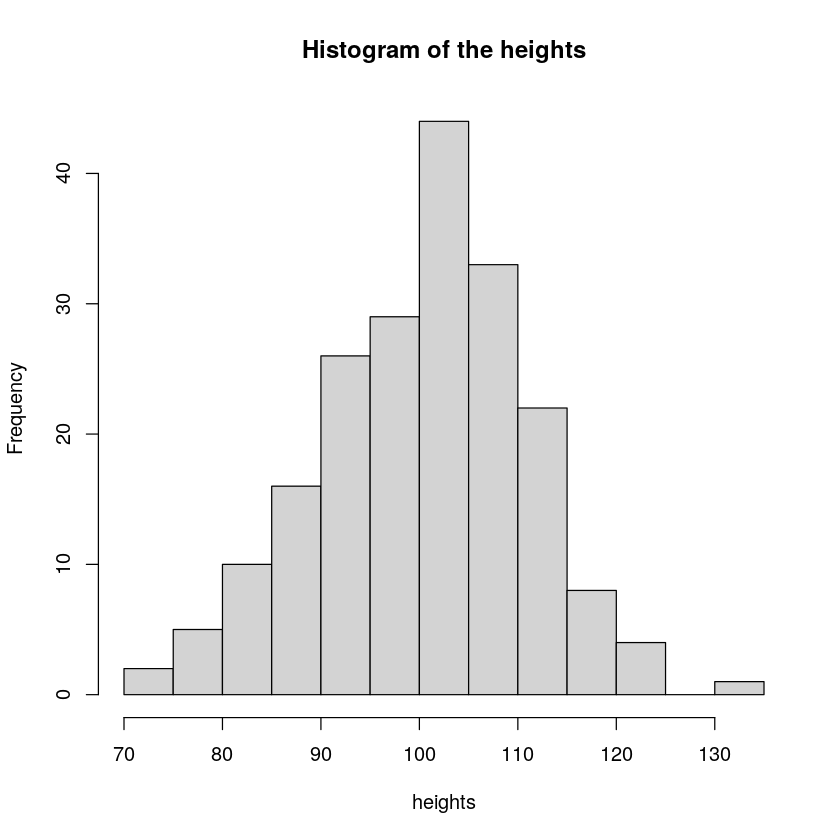

In [4]:
# YOUR CODE HERE
hist(h, main="Histogram of the heights", xlab = "heights")

mu <- 1/length(h) * sum(h)
"mu"
round(mu,3)

tau <- 1/ (  (1/length(h))*sum(h^2) - mu^2  )
"tau"
round(tau,5)

We are interested in knowing about $\mu$ and $\tau$. We therefore wish to calculate the probability $P(\mu, \tau \mid h, K)$. By Bayes theorem, we have
$$
P(\mu, \tau \mid h, K) \propto P(h \mid \mu, \tau, K) P(\mu, \tau \mid K)
$$

We will use the Normal-Gamma distribution as our distribution for $\mu$ and $\tau$ given $K$, which is given by:
$$
P(\mu, \tau \mid m, \nu, a, b, K) = d\mu\:d\tau\: {b^{a} \over \Gamma(a)}\: \tau^{a - 1}\: e^{-b\tau}\:\sqrt{\nu\tau \over 2\pi}\:\exp\left(-{\nu\tau \over 2}(\mu - m)^{2}\right)
$$

# Question

Show that $P(\mu, \tau | h, m, \nu, a, b, K) \propto P(h \mid \mu, \tau, K)\: P(\mu, \tau \mid m, \nu, a, b, K)$ is also a Normal-Gamma distribution, with parameters (shown with primes): [8]
\begin{align*}
m' & = {\nu m + n \bar{h} \over (\nu + n)} \\
\nu' & = \nu + n \\
a' & = a + {n \over 2} \\
b' & = b + {n \over 2} \left(s^{2} + {\nu \over (\nu + n)} (\bar{h} - m)^{2}\right)
\end{align*}


## Answer 

Given:

$$
P(\mu, \tau \mid h, K) \propto P(h \mid \mu, \tau, K) P(\mu, \tau \mid K)
$$

$$
P(\mu, \tau \mid m, \nu, a, b, K) = d\mu\:d\tau\: {b^{a} \over \Gamma(a)}\: \tau^{a - 1}\: e^{-b\tau}\:\sqrt{\nu\tau \over 2\pi}\:\exp\left(-{\nu\tau \over 2}(\mu - m)^{2}\right)
$$

&

$$
P(h \mid \mu, \tau, K) 
= dh\: \left({\tau \over 2\pi}\right)^{n/2} \exp\left(-{n\tau \over 2}[(\mu - \bar{h})^{2} + s^{2}]\right)
$$

We start with:

$$
P(\mu, \tau \mid h, K) \propto dh\: \left({\tau \over 2\pi}\right)^{n/2} \exp\left(-{n\tau \over 2}[(\mu - \bar{h})^{2} + s^{2}]\right) d\mu\:d\tau\: {b^{a} \over \Gamma(a)}\: \tau^{a - 1}\: e^{-b\tau}\:\sqrt{\nu\tau \over 2\pi}\:\exp\left(-{\nu\tau \over 2}(\mu - m)^{2}\right)
$$

$$
RHS \propto  dh\:d\mu\:d\tau\:{b^{a} \over \Gamma(a)}\: \tau^{a - 1}\: e^{-b\tau}\:\sqrt{\nu\tau \over 2\pi}\:\left({\tau \over 2\pi}\right)^{n/2}\exp\left({-\tau\over2}(n\mu^{2} - 2\bar{h}\mu n + \bar{h}^{2}n + ns^{2} + \nu\mu^{2} - 2m\mu\nu+m^{2}\nu)\right)
$$

$$
RHS \propto  dh\:d\mu\:d\tau\: {b^{a} \over \Gamma(a)}\: \tau^{a - 1 + {n \over2} } \: e^{-b\tau - {\tau ns^{2}\over2}}\:\sqrt{\nu\tau \over 2\pi}\:\left({1 \over 2\pi}\right)^{n/2}\exp\left({-\tau\over2}(n\mu^{2} - 2\bar{h}\mu n + \bar{h}^{2}n + \nu\mu^{2} - 2m\mu\nu+m^{2}\nu)\right)
$$

Note: Here we factored all the $\tau 's$ together and we moved the ${-\tau ns^{2}\over2}$ term in the big exponential to the smaller exponential involving b.

Now lets focus on the terms inside the big exponential:

We have in the exponent of the exponential:
$$
({-\tau\over2}(n\mu^{2} - 2\bar{h}\mu n + \bar{h}^{2}n + \nu\mu^{2} - 2m\mu\nu+m^{2}\nu))
$$

we find some common terms:

$$
({-\tau\over2}(\mu^{2}(n+\nu) - 2\mu(\bar{h}n + m\nu) + \bar{h}^{2}n + m^{2}\nu))
$$

We take the (n+$\nu$) factor out:

$$
({-\tau(n+\nu)\over2} (\mu^{2} - {2\mu(\bar{h}n + m\nu)\over(n+\nu)} + {(\bar{h}^{2}n + m^{2}\nu)\over(n+\nu)})
$$

Next we complete the square in terms of $\mu$

$$
({-\tau(n+\nu)\over2} 
( (\mu - {(\bar{h}n + m\nu)\over(n+\nu)})^{2} - ({(\bar{h}n + m\nu)\over(n+\nu)})^{2} + {(\bar{h}^{2}n + m^{2}\nu)\over(n+\nu)})
)
$$

now going back to the main equation and swapping the old exponent with the rearranged one we get:

$$
RHS \propto  dh\:d\mu\:d\tau\: {b^{a} \over \Gamma(a)}\: \tau^{a - 1 + {n \over2}} \: e^{-b\tau - {\tau ns^{2}\over2}}\:\sqrt{\nu\tau \over 2\pi}\:\left({1 \over 2\pi}\right)^{n/2}\exp\left({-\tau(n+\nu)\over2} 
( (\mu - {(\bar{h}n + m\nu)\over(n+\nu)})^{2} - ({(\bar{h}n + m\nu)\over(n+\nu)})^{2} + {(\bar{h}^{2}n + m^{2}\nu)\over(n+\nu)})
)\right)
$$

$$
RHS \propto  dh\:d\mu\:d\tau\: {b^{a} \over \Gamma(a)}\: \tau^{a - 1 + {n \over2} } \: e^{-b\tau - {\tau ns^{2}\over2} -{\tau(n+\nu)\over2}(-({ (\bar{h}n + m\nu) \over (n+\nu)} )^{2}+ {(\bar{h}^{2}n + m^{2}\nu)\over(n+\nu)})}\:\sqrt{\nu\tau \over 2\pi}\:\left({1 \over 2\pi}\right)^{n/2}\exp\left({-\tau(n+\nu)\over2} 
 (\mu - {(\bar{h}n + m\nu)\over(n+\nu)})^{2} \right)
$$

Now we focus on the exponent of the exponential with the b term in it:


$$
{-b\tau - {\tau ns^{2}\over2} -{\tau(n+\nu)\over2}(-({ (\bar{h}n + m\nu) \over (n+\nu)} )^{2}+ {(\bar{h}^{2}n + m^{2}\nu)\over(n+\nu)})}
$$

Note: I changed the signs here inside the bracket

$$
{-b\tau - {\tau ns^{2}\over2} +{\tau(n+\nu)\over2}(({ (\bar{h}n + m\nu) \over (n+\nu)} )^{2}- {(\bar{h}^{2}n + m^{2}\nu)\over(n+\nu)})}
$$

$$
{-\tau (b +{n\over2} {({s^{2}} +{1\over n}(({ (\bar{h}n + m\nu)^{2} \over (n+\nu)} )- {(\bar{h}^{2}n + m^{2}\nu)\over(n+\nu)}(n+\nu)))})}
$$

$$
{-\tau (b +{n\over2} {({s^{2}} + {1\over n} {( n^{2}\bar{h}^2 +\nu^{2}m^{2} + 2n\bar{h}\nu m )\over{(n+\nu)}} 
- {1\over n} {( n^{2}\bar{h}^2 +n\bar{h}^{2}\nu +m^{2}\nu n +m^{2}\nu^{2})\over{(n+\nu)}}
}))}
$$

Note: Terms cancel here, and we factor n and $\nu$ out.
$$
{-\tau (b +{n\over2} {({s^{2}} 
+ {n\nu\over n(n+\nu)} {(  2\bar{h} m  - \bar{h}^{2} +m^{2} )}
}))}
$$

$$
{-\tau (b +{n\over2} {({s^{2}} 
+ {\nu\over (n+\nu)} {(\bar{h}  -m)^{2}}
}))}
$$

Now using this rearranged exponent we get:

$$
RHS \propto  dh\:d\mu\:d\tau\: {b^{a} \over \Gamma(a)}\: \tau^{a - 1 + {n \over2}} \: e^{{-\tau (b +{n\over2} {({s^{2}} 
+ {\nu\over (n+\nu)} {(\bar{h}  -m)^{2}}
}))}}\:\sqrt{\nu\tau \over 2\pi}\:\left({1 \over 2\pi}\right)^{n/2}\exp\left({-\tau(n+\nu)\over2} 
 (\mu - {(\bar{h}n + m\nu)\over(n+\nu)})^{2} \right)
$$

From this final result we can clear visually see it is also a Normal-Gamma distribution and we get new params of:

\begin{align*}
m' & = {\nu m + n \bar{h} \over (\nu + n)} \\
\nu' & = \nu + n \\
a' & = a + {n \over 2} \\
b' & = b + {n \over 2} \left(s^{2} + {\nu \over (\nu + n)} (\bar{h} - m)^{2}\right)
\end{align*}

# Question

What is this behaviour called? [1]

## Answer

Conjugate distribution

Now suppose that prior knowledge tells us that $\nu = 0$, $a = 0$, and $b = 0$. 


# Question

Write down and give the family name for:

1. the distribution $P(\mu, \tau | h, m, \nu = 0, a = 0, b = 0, K)$; [1]
2. the conditional distribution $P(\mu | \tau, h, m, \nu = 0, a = 0, b = 0, K)$; [2]
3. the conditional distribution $P(\tau | \mu, h, m, \nu = 0, a = 0, b = 0, K)$; [2]
3. the marginalized distribution $P(\tau | h, m, \nu = 0, a = 0, b = 0, K)$. [4]


## Answer 

1) $P(\mu, \tau | h, m, \nu = 0, a = 0, b = 0, K) \propto dh\:d\mu\:d\tau\: \tau^{- 1 + {n \over2}} \: e^{{-\tau s^{2} n\over2}} 
\sqrt{n\tau \over 2\pi}\exp\left({-\tau n\over2} (\mu - \bar{h})^{2} \right)
$


Family Name = Normal Gamma distribution


2) $${P(\mu | \tau, h, m, \nu = 0, a = 0, b = 0, K) } = {P(\mu, \tau | h, m, \nu = 0, a = 0, b = 0, K) \over P(\tau | h, m, \nu = 0, a = 0, b = 0, K)}
$$

$$
= {P(\mu, \tau | h, m, \nu = 0, a = 0, b = 0, K) \over \int P(\mu, \tau | h, m, \nu = 0, a = 0, b = 0, K) d\mu} 
$$

$$
= {{\tau^{- 1 + {n \over2}} \: e^{{-\tau s^{2} n\over2}} 
\sqrt{n\tau \over 2\pi}\exp\left({-\tau n\over2} (\mu - \bar{h})^{2} \right)} \over \tau^{- 1 + {n \over2}} \: e^{{-\tau s^{2} n\over2}} 
\sqrt{n\tau \over 2\pi}\int\exp\left({-\tau n\over2} (\mu - \bar{h})^{2} \right) d\mu}
$$

$$
Using - this:     \int\exp\left({-\tau n\over2} (\mu - \bar{h})^{2} \right) d\mu = ({2\pi \over n\tau})^{1\over 2}  
$$

we get:
$$
= ({ n\tau \over 2\pi})^{1\over 2}  \exp\left({-\tau n\over2} (\mu - \bar{h})^{2} \right)
$$

Family Name = Normal distribution: mean $\bar{h}$ and variance $ 1\over \tau n$

3) $${P(\tau | \mu, h, m, \nu = 0, a = 0, b = 0, K) } = {P(\mu, \tau | h, m, \nu = 0, a = 0, b = 0, K) \over P(\mu | h, m, \nu = 0, a = 0, b = 0, K)}
$$

$$
= {P(\mu, \tau | h, m, \nu = 0, a = 0, b = 0, K) \over \int P(\mu, \tau | h, m, \nu = 0, a = 0, b = 0, K) d\tau} 
$$

$$
= {{\tau^{- 1 + {n \over2}} \: e^{{-\tau s^{2} n\over2}} 
\sqrt{n\tau \over 2\pi}\exp\left({-\tau n\over2} (\mu - \bar{h})^{2} \right)} \over \tau^{- 1 + {n \over2}} \: e^{{-\tau s^{2} n\over2}} 
\sqrt{n\tau \over 2\pi}\int\exp\left({-\tau n\over2} (\mu - \bar{h})^{2} \right) d\tau}
$$

Now we hve to collect all $\tau's$ and say $ {a = { n \over 2} + {1 \over 2}}$ and ${b = {n\over2}{(s^{2} +(\mu - \bar{h})^{2})}}$

$$
= {{\tau^{a-1}\exp(-\tau b)} \over \int {\tau^{a-1}\exp(-\tau b)d\tau}  }
$$

$$
\propto { {\tau^{a-1}\exp(-\tau b)}}
$$

Family Name = Gamma distribution: $ {a = { n \over 2} + {1 \over 2}}$ and ${b = {n\over2}{(s^{2} +(\mu - \bar{h})^{2})}}$

4) $$ {P(\tau | h, m, \nu = 0, a = 0, b = 0, K) } = \int{P(\mu, \tau | h, m, \nu = 0, a = 0, b = 0, K)d\mu}
$$

$$
=  {{\tau^{- 1 + {n \over2}} \: e^{{-\tau s^{2} n\over2}} 
\sqrt{n\tau \over 2\pi}\int\exp\left({-\tau n\over2} (\mu - \bar{h})^{2} \right)} d\mu}
$$


$$
=  {{\tau^{- 1 + {n \over2}} \: e^{{-\tau s^{2} n\over2}} 
\sqrt{n\tau \over 2\pi}}} {({2\pi\over \tau n})^{1\over2}}
$$

$$
=  {{\tau^{- 1 + {n \over2}} \: e^{{-\tau s^{2} n\over2}} }}
$$

saying  $ {a = { n \over 2}}$ and ${b = {ns^{2}\over2}}$

we have :

$$ {P(\tau | h, m, \nu = 0, a = 0, b = 0, K) } \propto { {\tau^{a-1}\exp(-\tau b)}}
$$

Therefore: #

Family Name = Gamma distributio: $ {a = { n \over 2}}$ and ${b = {ns^{2}\over2}}$

# Question

Write an R function to evaluate the logarithm of the density, with respect to $d\mu\: d\tau$, of $P(\mu, \tau \mid h, K)$, up to an additive constant. Note that the conditions $\nu = 0, a = 0, b = 0$ have been absorbed into $K$, $m$ has been dropped because, given these conditions, the probability does not depend on $m$. The function should have as inputs $\mu$, $\tau$, and the data (in this case `heights`), and should calculate $n$, $\bar{h}$, and $s$ as part of its execution. [5]

## Answer 

In [5]:
# YOUR CODE HERE
Logden = function(mu, tau, data){
    
    n <- length(data)
    h_bar <- mean(data)
    s_2 <- sum(data^2)/n - h_bar^2 
    k <- 1 #constant
    
    #maybe multiply by dmu and dtau
    #density <- k*tau^(n*0.5 -1)*exp(-tau*n*s_2*0.5)*exp(-n*tau*0.5*(mu-h_bar)^2)*sqrt(tau*n*0.5/pi)
    density <- k*tau^(n*0.5 -1)*exp(-tau*n*s_2*0.5)*exp(-n*tau*0.5*(mu-h_bar)^2)*sqrt(tau)
    
    logden <- log(density)
    
    fit <-list("den"=density, "logden"=logden, "n"=n, "h"= h_bar , "s"= sqrt(s_2))
    
    return(fit)
    
}
Logden(100.5,0.009,h)

$den
[1] 5.956174e-247

$logden
[1] -566.9541

$n
[1] 200

$h
[1] 100.5128

$s
[1] 10.44861

# Question

Compute the value of the logarithm of the density (with respect to $d\mu\: d\tau$) of $P(\mu, \tau \mid h, K)$ on a rectangular grid of $(\mu, \tau)$ values with ranges $[98, 103]$ and $[0.005, 0.015]$ for $\mu$ and $\tau$ respectively. [2]

## Answer

In [6]:
# YOUR CODE HERE
#Range of params
mus <- seq(98,103,0.005)
taus<- seq(0.005,0.015,0.00005)
mu_N = length(mus)
tau_N = length(taus)

#Grids (two: one for log(den) the other for just den)
grid_Lden <- matrix(0, nrow = mu_N, ncol=tau_N)
grid_den <- matrix(0, nrow = mu_N, ncol=tau_N)

#Filling the grid
for(i in 1:mu_N){
    for(j in 1:tau_N){
        grid_Lden[i,j] <- Logden(mus[i],taus[j], h)$logden
        grid_den[i,j] <- Logden(mus[i],taus[j], h)$den
    }
}

grid_Lden


-584.9265,-584.5139,-584.1110,-583.7177,-583.3338,-582.9591,-582.5934,-582.2365,-581.8884,-581.5488,⋯,-588.9361,-589.1722,-589.4095,-589.6479,-589.8875,-590.1282,-590.3701,-590.6130,-590.8571,-591.1024
-584.9139,-584.5012,-584.0982,-583.7048,-583.3207,-582.9459,-582.5801,-582.2231,-581.8748,-581.5351,⋯,-588.8996,-589.1356,-589.3727,-589.6110,-589.8505,-590.0910,-590.3328,-590.5756,-590.8196,-591.0647
-584.9014,-584.4885,-584.0854,-583.6919,-583.3077,-582.9327,-582.5668,-582.2097,-581.8613,-581.5214,⋯,-588.8631,-589.0990,-589.3360,-589.5742,-589.8135,-590.0540,-590.2956,-590.5383,-590.7822,-591.0271
-584.8889,-584.4759,-584.0727,-583.6790,-583.2947,-582.9196,-582.5535,-582.1963,-581.8478,-581.5078,⋯,-588.8267,-589.0625,-589.2994,-589.5374,-589.7766,-590.0170,-590.2584,-590.5011,-590.7448,-590.9896
-584.8764,-584.4633,-584.0599,-583.6661,-583.2817,-582.9065,-582.5403,-582.1830,-581.8343,-581.4942,⋯,-588.7904,-589.0260,-589.2628,-589.5007,-589.7398,-589.9800,-590.2214,-590.4639,-590.7075,-590.9522
-584.8640,-584.4507,-584.0472,-583.6533,-583.2688,-582.8934,-582.5271,-582.1696,-581.8209,-581.4806,⋯,-588.7542,-588.9897,-589.2263,-589.4641,-589.7031,-589.9432,-590.1844,-590.4268,-590.6702,-590.9148
-584.8515,-584.4382,-584.0346,-583.6405,-583.2558,-582.8804,-582.5139,-582.1563,-581.8074,-581.4671,⋯,-588.7180,-588.9534,-589.1899,-589.4276,-589.6664,-589.9064,-590.1475,-590.3897,-590.6331,-590.8776
-584.8391,-584.4257,-584.0219,-583.6277,-583.2429,-582.8674,-582.5008,-582.1431,-581.7940,-581.4536,⋯,-588.6820,-588.9172,-589.1536,-589.3911,-589.6298,-589.8697,-590.1107,-590.3528,-590.5960,-590.8404
-584.8268,-584.4132,-584.0093,-583.6150,-583.2301,-582.8544,-582.4877,-582.1298,-581.7807,-581.4401,⋯,-588.6459,-588.8810,-589.1173,-589.3547,-589.5933,-589.8331,-590.0739,-590.3159,-590.5590,-590.8032
-584.8144,-584.4007,-583.9967,-583.6023,-583.2172,-582.8414,-582.4746,-582.1166,-581.7673,-581.4266,⋯,-588.6100,-588.8450,-589.0811,-589.3184,-589.5569,-589.7965,-590.0372,-590.2791,-590.5221,-590.7662
-584.8021,-584.3882,-583.9841,-583.5896,-583.2044,-582.8284,-582.4615,-582.1034,-581.7540,-581.4132,⋯,-588.5741,-588.8090,-589.0450,-589.2822,-589.5205,-589.7600,-590.0006,-590.2424,-590.4852,-590.7292


#### Question

Make contour and image / heatmap plots of these values and of the corresponding probabilities (up to a multiplicative constant). [4]

## Answer

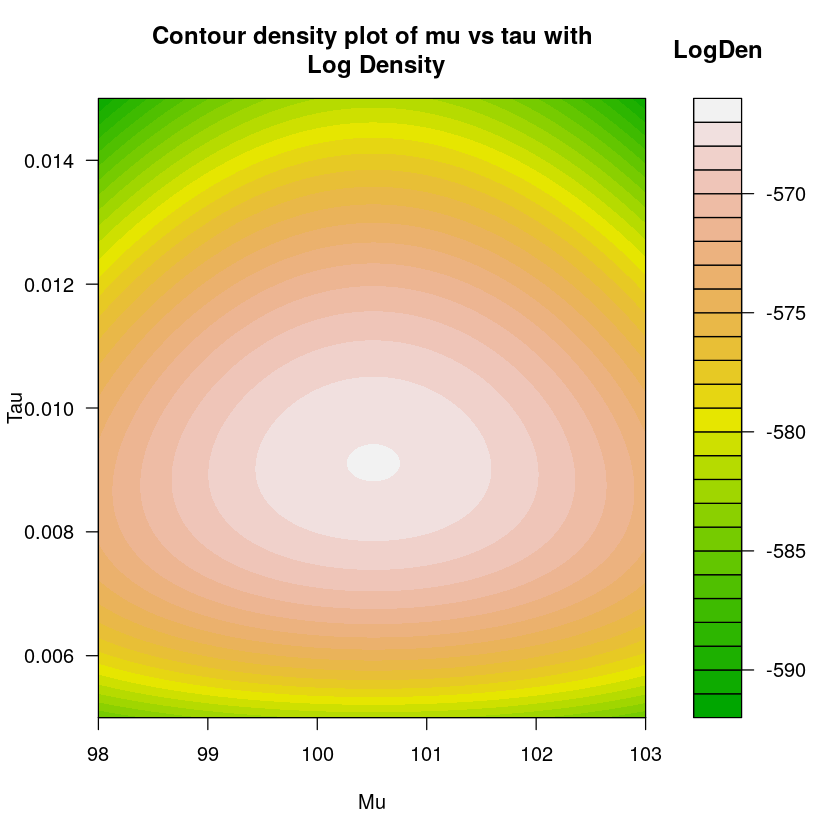

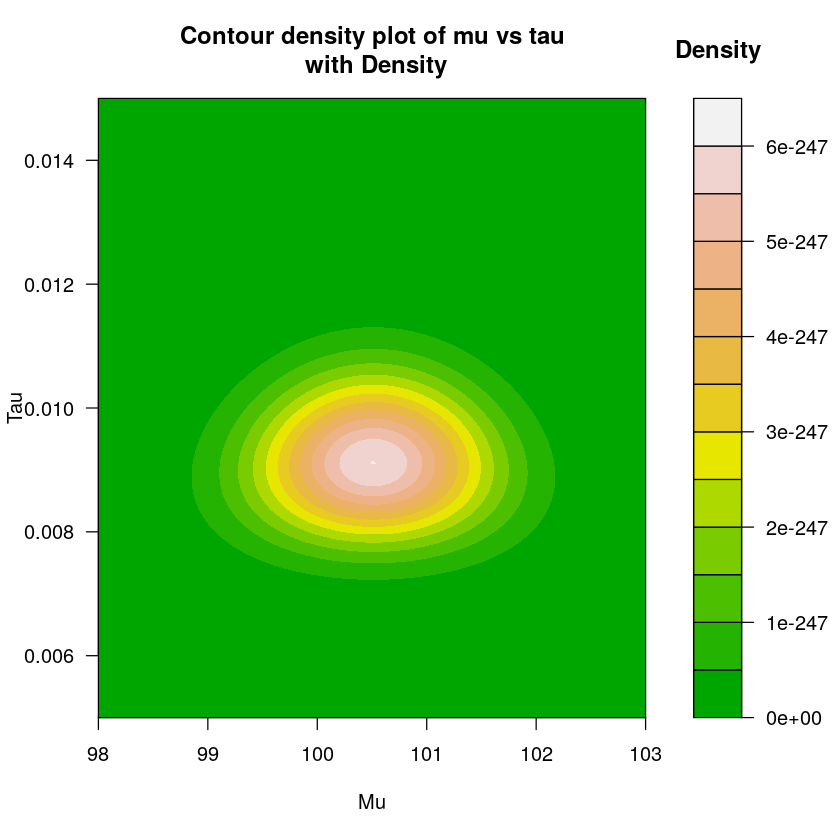

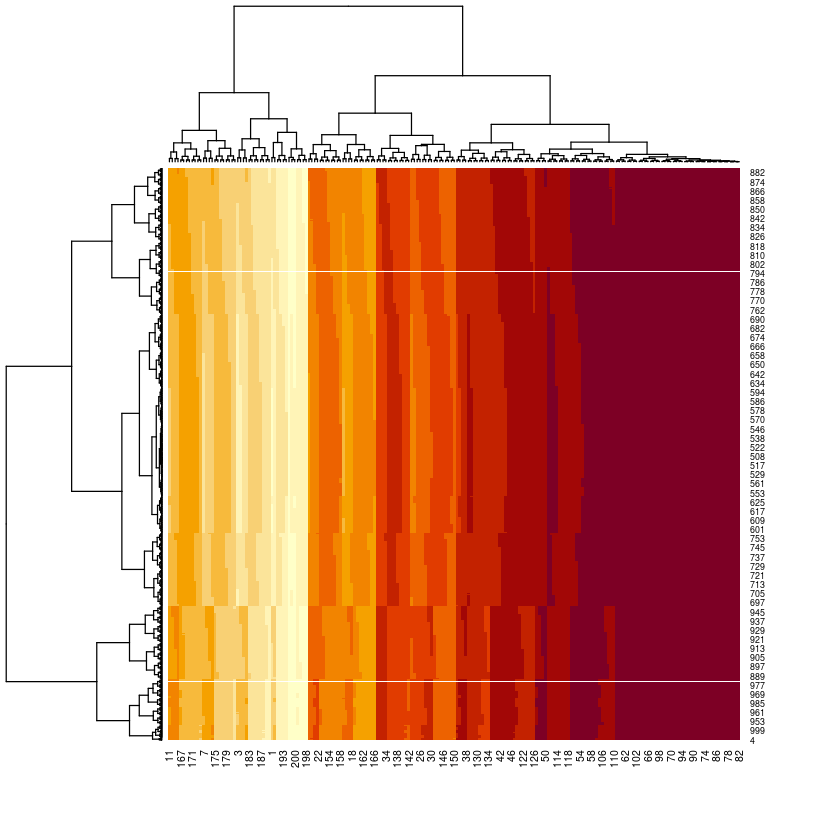

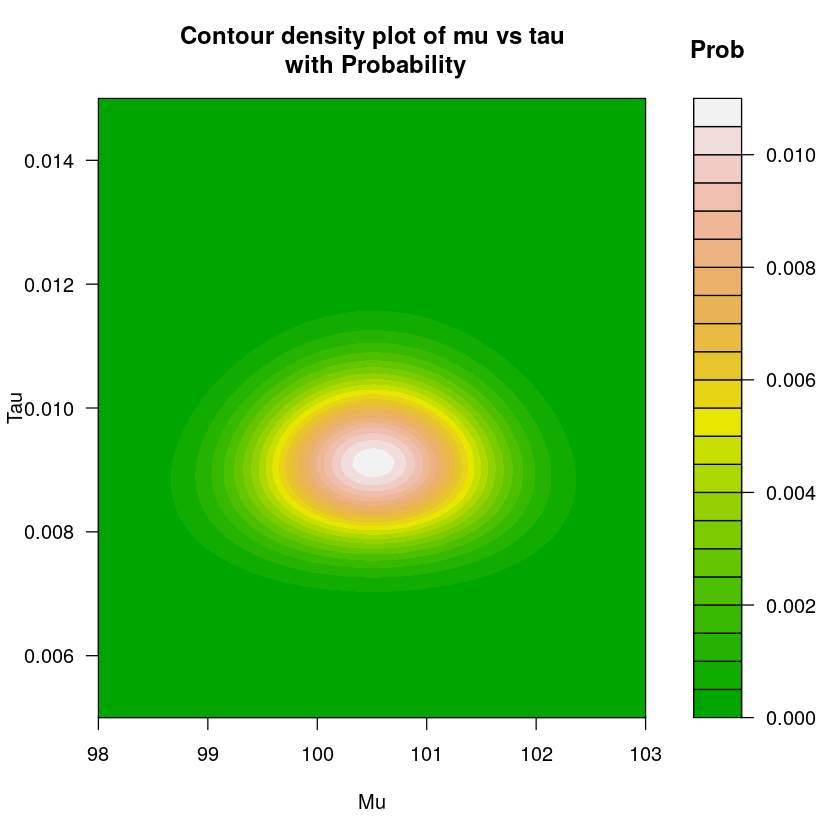

In [7]:
# YOUR CODE HERE

filled.contour(x = mus,y = taus,
z = grid_Lden, color.palette = terrain.colors,
plot.title = title(main = "Contour density plot of mu vs tau with\n Log Density",
xlab = "Mu",ylab = "Tau"),
key.title = title(main="LogDen"))


filled.contour(x = mus,y = taus,
z = grid_den, color.palette = terrain.colors,
plot.title = title(main = "Contour density plot of mu vs tau\n with Density",
xlab = "Mu",ylab = "Tau"),
key.title = title(main="Density"))


heatmap(grid_Lden, Colv = mus, Rowv = taus)


#Trying to convert to probabilities
scalar1 <- function(x) {x / sqrt(sum(x^2))}
Norm_vec<-scalar1(as.vector(grid_den*10^250))
Norm_matrix<-matrix(Norm_vec,nrow = mu_N,ncol = tau_N)

filled.contour(x = mus,y = taus,
z = Norm_matrix, color.palette = terrain.colors,
plot.title = title(main = "Contour density plot of mu vs tau\n with Probability",
xlab = "Mu",ylab = "Tau"),
key.title = title(main="Prob"))

# Question

Use the grid probabilities to compute (approximations to) the expectations and standard deviations of $\mu$ and $\tau$ under $P(\mu, \tau \mid h, K)$. Hint: remember to normalize! [4]

## Answer 

In [8]:
# YOUR CODE HERE
#max(grid_Lden)
"Main approach using Log(Density)"
MU <- mus[which(grid_Lden == max(grid_Lden), arr.ind = TRUE)[1,1]]

TAU <- taus[which(grid_Lden == max(grid_Lden), arr.ind = TRUE)[1,2]]

"ANSWER:"
"mu"
round(MU,4)
"tau"
round(TAU,5)
"STD(mus)"
round(sd(mus),4)
"STD(taus)"
round(sd(taus),5)


"#############################"
"Approach 2 using probabilties, get the same answers"
"#############################"
MU <- mus[which(Norm_matrix == max(Norm_matrix), arr.ind = TRUE)[1,1]]

TAU <- taus[which(Norm_matrix == max(Norm_matrix), arr.ind = TRUE)[1,2]]

"mu"
round(MU,4)
"tau"
round(TAU,5)
"STD(mus)"
round(sd(mus),4)
"STD(taus)"
round(sd(taus),5)

[1] "Main approach using Log(Density)"

[1] "ANSWER:"

[1] "mu"

[1] 100.515

[1] "tau"

[1] 0.0091

[1] "STD(mus)"

[1] 1.4455

[1] "STD(taus)"

[1] 0.00291

[1] "#############################"

[1] "Approach 2 using probabilties, get the same answers"

[1] "#############################"

[1] "mu"

[1] 100.515

[1] "tau"

[1] 0.0091

[1] "STD(mus)"

[1] 1.4455

[1] "STD(taus)"

[1] 0.00291

# Question

Could you have used smaller ranges for $\mu$ and $\tau$? Make sure to justify your answer. [1]

## Answer

We could have, the MLEs are well within the range. If we reduce the range but ensuring the MLEs are still in it then this would be suitable as the estimates will tend towards the MLE values.

# Question

Write R functions to perform *Gibbs sampling* to generate samples of $\mu$ and $\tau$. [10]

## Answer 

In [9]:
# YOUR CODE HERE

gibbsmu = function(oldtau, data) {
  
    m = mean(data)
    n = length(data)
    
    newmu = rnorm(1, m, sqrt(1/(n*oldtau)))
    #I amy have done the variance wrong as I thought for this conditinal distribution
    #Variance = 1/n*tau there fore the correct answer maybe  without the sqrt.

    return(newmu)
}


gibbstau = function(oldmu, data) {
    
    n <- length(data)
    h_bar <- mean(data)
    s_2 <- sum(data^2)/n - h_bar^2 
    
    a = n/2 + 1/2
    #This may be wrong I absorbed the tau in the square root..
    #So a might be a = n/2 if I shouldnt have done that
    
    b= n/2 * (s_2 + (oldmu-h_bar)^2)
    newtau = rgamma(1, a, b)

    return(newtau)
  
}


gibbsNormGamma = function(initmu, inittau, N,data){
    
  
  mus <- vector(length = N)
  taus <- vector(length = N)
  
  # Set initial values
  mus[1] = initmu
  taus[1] = inittau
  
  # Gibbs sampling
  for (i in 2:N) {
    
      newtau = gibbstau(mus[i - 1], data)
    
      taus[i] = newtau

      newmu = gibbsmu(taus[i], data)
    
      mus[i] = newmu
    
  }
  

    samples = rbind(mus, taus)

    return(samples)
  
}

# Question

What would make a good starting point for Gibbs sampling and why? [2]

## Answer 

The MLE values are a good starting point. It will speed up the convergence of the algorithm. They are good starting values as they are the most likely values. If you think of it in terms of finding the maximum density, if you dont pick the MLEs you may get stuck at a local maxima, where as picking the MLEs you are mostliekly to converge to the global maxima.

# Question

Generate 5,000 samples of $(\mu, \tau)$ and plot traces of the samples and of their autocorrelation. [8]

## Answer 

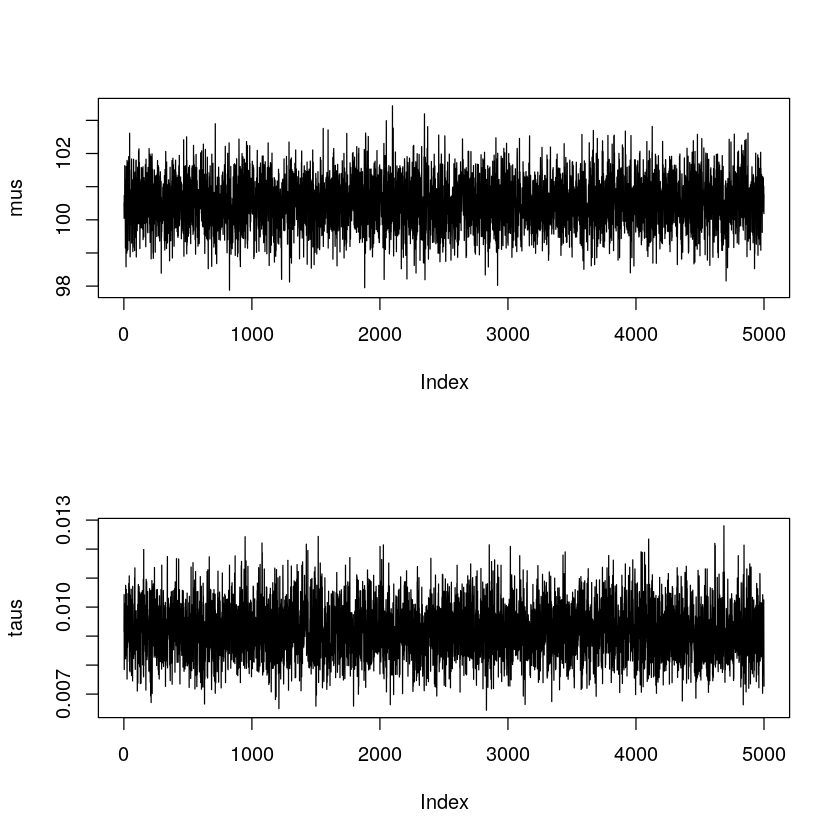

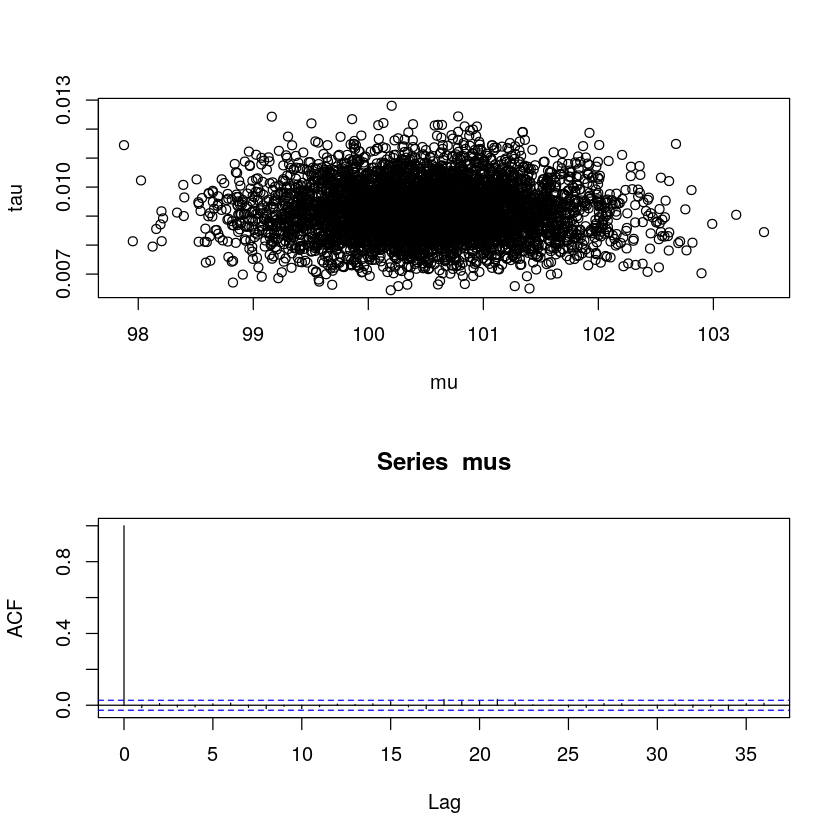

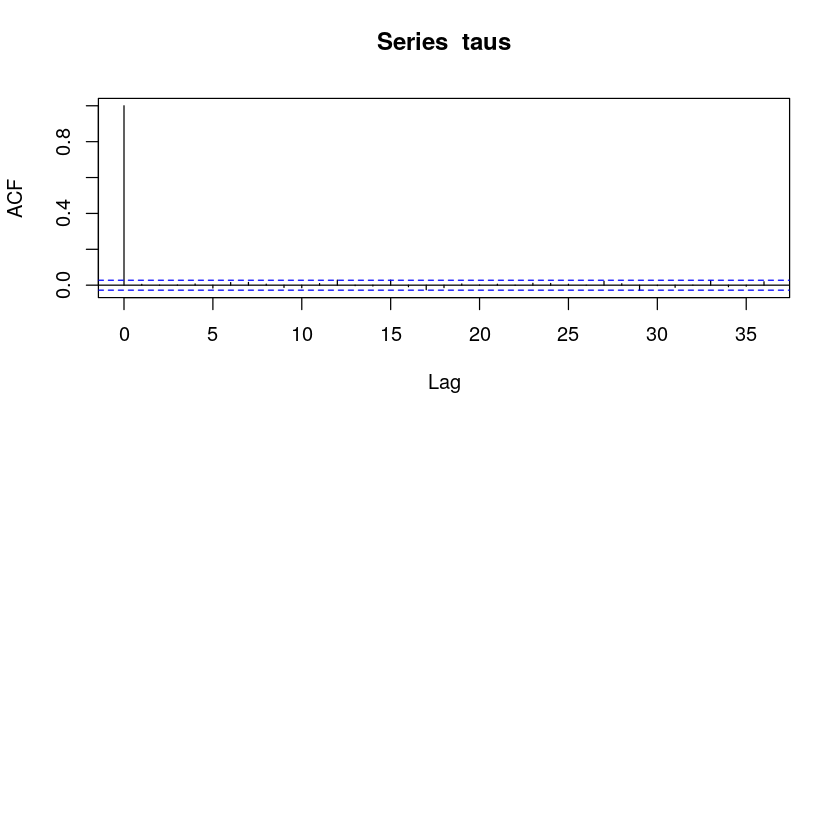

In [10]:
# YOUR CODE HERE
plotMuTauSamp = function(sample){
    
    mus = sample[1,]
    taus = sample[2,]
    
    par(mfrow = c(2, 1))
    plot(mus, type = 'l')
    plot(taus, type = 'l')
    
    dfsample = as.data.frame(t(sample))
    names(dfsample) = c('mu', 'tau')
    
    plot(dfsample)  
    
    rhomu = acf(mus)$acf
    rhotau = acf(taus)$acf

}

gibbsSample = gibbsNormGamma(1/length(h) * sum(h), 1/ (  (1/length(h))*sum(h^2) - mu^2  ), 5000, h)
plotMuTauSamp(gibbsSample)


# Question

Compute estimates of the expectations and standard deviations of $\mu$ and $\tau$ using the samples. [5]

## Answer 

In [11]:
# YOUR CODE HERE

sample <- gibbsSample 
bi<-0 #no burn in as not mentioned
mus = sample[1,]
taus= sample[2,]
  
dfsample = as.data.frame(t(sample))
names(dfsample) = c('mu', 'tau')

# Subtract burn-in
vmus = mus[(bi + 1):length(mus)]
vtaus = taus[(bi + 1):length(taus)]
vdfsample = dfsample[(bi + 1):nrow(dfsample),]

  
print(paste("Estimated expected value of mu is:", mean(vmus)))
print(paste("Estimated expected value of tau is:", mean(vtaus)))
    
print(paste("Estimated standard deviation of mu is:", sd(vmus)))
print(paste("Estimated standard deviation of tau is:", sd(vtaus)))

[1] "Estimated expected value of mu is: 100.51137476697"
[1] "Estimated expected value of tau is: 0.00917992045280262"
[1] "Estimated standard deviation of mu is: 0.749791864174105"
[1] "Estimated standard deviation of tau is: 0.000928810298187869"


# Question

Compute the Monte-Carlo standard errors of the mean estimates. [5]

## Answer 

In [12]:
# YOUR CODE HERE
sample <- gibbsSample 
bi<-0

mus = sample[1,]
taus= sample[2,]
  

    
dfsample = as.data.frame(t(sample))
names(dfsample) = c('mu', 'tau')

    
# Subtract burn-in
vmus = mus[(bi + 1):length(mus)]
vtaus = taus[(bi + 1):length(taus)]
vdfsample = dfsample[(bi + 1):nrow(dfsample),]


   
x = mcmc(data = vdfsample)
    
# print(effectiveSize(x))
    
ESSmu = effectiveSize(vmus)
ESStau = effectiveSize(vtaus)
   
print(paste("MCMC standard error of mu is:", sd(vmus)/ESSmu))
print(paste("MCMC standard error of tau is:", sd(vtaus)/ESStau))

[1] "MCMC standard error of mu is: 0.000149958372834821"
[1] "MCMC standard error of tau is: 1.85762059637574e-07"


# Question

Comment on the need for burn-in iterations and on the degree of autocorrelation, and relate these to the effective sample sizes. Make sure to justify your statements. [3]

## Answer 

YOUR ANSWER HERE

Burn in iterations are to reduce the autocorrelation between samples. Usually the first 'few' samples will have a higher autocorrilation than the others there fore we remove them (burn-in). With high autocorrelation we will have a smaller sample size. this is becasue more of our samples will be correlated making them 'less unique' which reduces the size of our sample. there fore we would have to have a large burn in in this case reducing the number of samples we use to estimate things. 

i.e 

High autocorrelation then larger burn in and smaller sample size

low autocorrelation then smaller burn in and larger sample size

# Question

Write R code to make scatter and density plots of the samples from the previous question, and make the plots. [5]

## Answer 

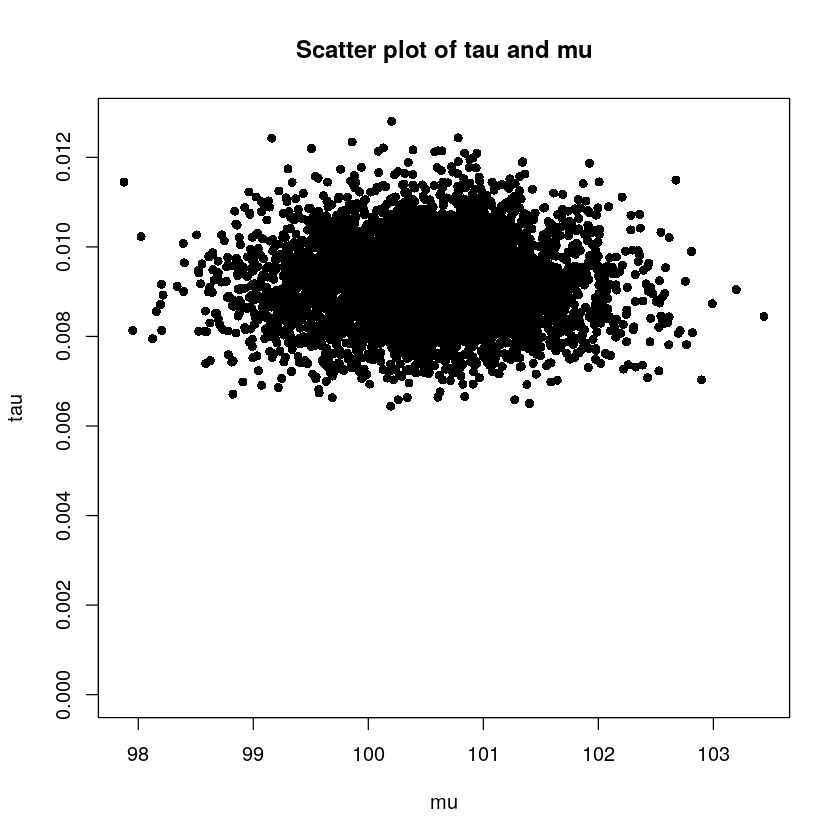

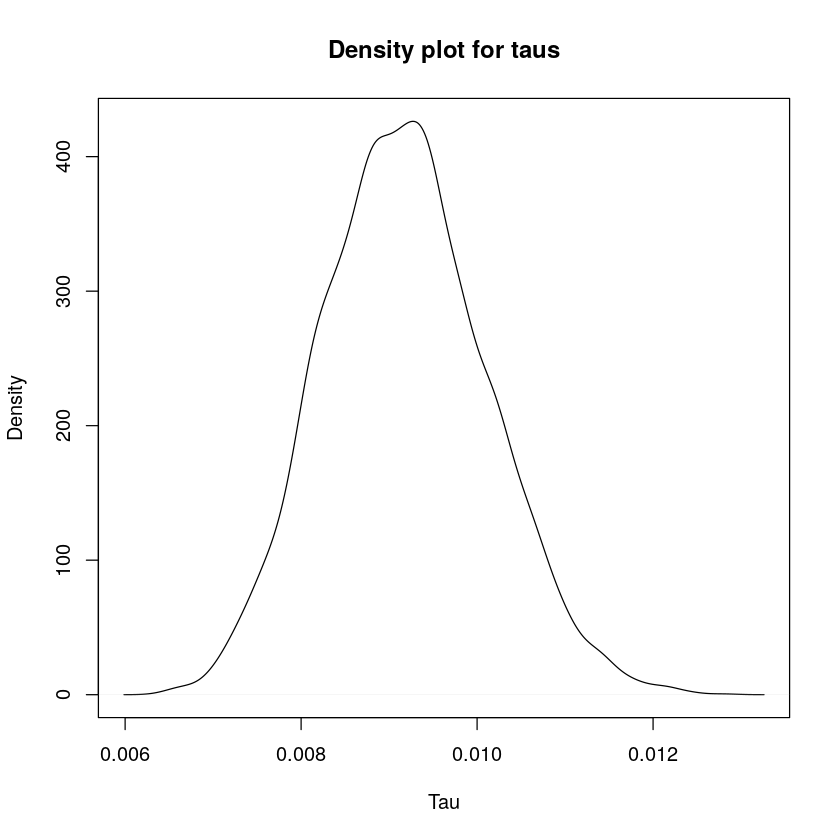

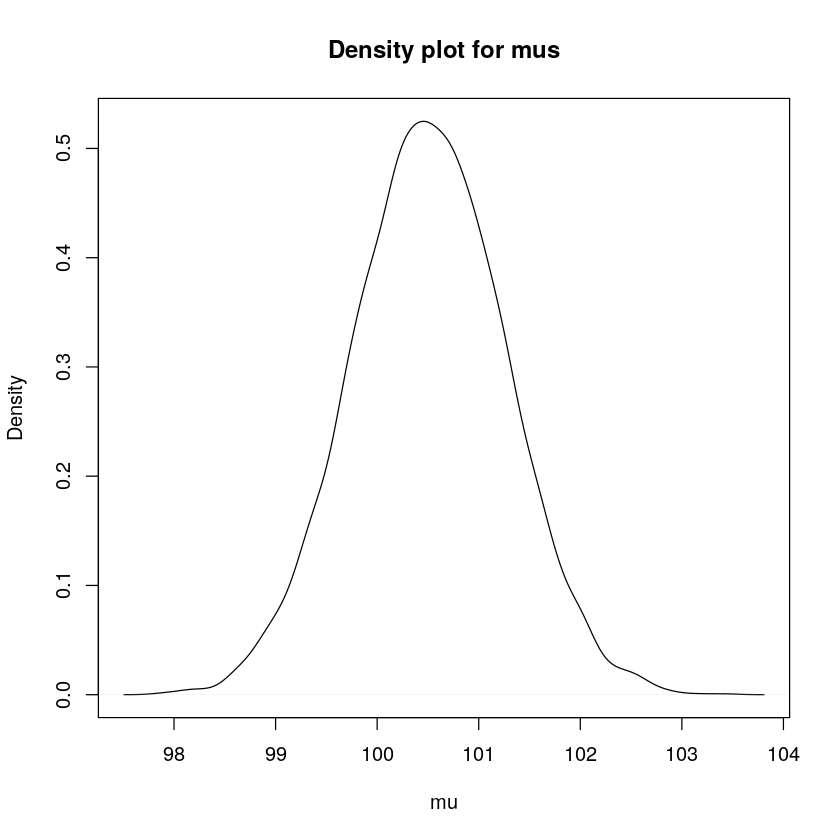

In [13]:
# YOUR CODE HERE
    
plot(dfsample, ylim = c(0, max(dfsample$tau)), type = 'o', main = "Scatter plot of tau and mu", pch=19, lwd = 0)

plot(density(vtaus), main="Density plot for taus", xlab = "Tau")
plot(density(vmus), main="Density plot for mus", xlab = "mu")

# Question

Compare the results of the Gibbs sampling with the MLEs calculated earlier. Make sure to explain your comments. [3]

## Answer 

YOUR ANSWER HERE

MLE's Result:

Mu = 100.515
Tau = 0.0091
STD on mu = 1.44554055633178
STD on tau = 0.00290839302708558

Gibbs Result:

"Estimated expected value of mu is: 100.516136847546"
"Estimated expected value of tau is: 0.00914995482016549"
"Estimated standard deviation of mu is: 0.739909680608165"
"Estimated standard deviation of tau is: 0.000921732439481168"

Both methods produced very similar results. I belive this is due to the gibbs method having a very low autocorrelation and there for tends toward the MLEs quickly. Gibbs samples nearly independently which means it is a very similar method to the first one.

# Questions

Describe a simpler alternative to Gibbs sampling. [4]

## Answer 

We essentially want to sample from $P(\mu, \tau | h, m, \nu = 0, a = 0, b = 0, K)$ this can be done very easily as we are only working in 1 dimension. So my recommended method would be inverse transform sampling. As we know the form of the density distribution.So this is was we do:

We want to sample from $ P_{Y}(y) = dy \rho_{Y}(y) $ i.e in this case $ P_{Y}(y) = P(\mu, \tau | h, m, \nu = 0, a = 0, b = 0, K)$#

Now: if $P(x) = dx$ then a transformation $ y = \epsilon (x)$
then: $ P_{Y}(y) = dy |(\epsilon ^{-1})^{'}(y)|$

then the algorithm is:

1) find $(\epsilon ^{-1})(y)$ i.e the cdf

2) invert it to find $\epsilon$

3) sample from $P(x) $

4) compute $y_{i} = \epsilon (x_{i})$

As we can easily find the CDF we can easily do this method as the CDF is well known.

Is this method better or worse and why? [2]

In this situation due to the well know CDF and being 1 dimensional, I would argue inverse sampling is better (I.e it is always chosen over gibbs if it is applicable) due to a number of reasons.

1) Its really simple to code
2) Much faster as we know the cdf
3) and we can sample completly independently (unlike gibbs)